# Abstract : 
In this Kaggle competition we're predicting the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).  The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

- Spruce/Fir
- Lodgepole Pine
- Ponderosa Pine
- Cottonwood/Willow
- Aspen
- Douglas-fir
- Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).



In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import h2o

from h2o.automl import H2OAutoML




 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')



In [3]:
df_train.shape

(15120, 56)

In [4]:
df_test.shape

(565892, 55)

# Total of 15,120 enteries in Train and 565,892 enteries in Test dataset

# Lets explore the data

In [5]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [6]:
df_train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [7]:
pd.set_option('display.max_columns', None)
df_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [8]:
df_train.apply(lambda x: sum(x.isnull()),axis=0)

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [10]:
df_train.apply(lambda x : sum(x == 0),axis=0)

Id                                        0
Elevation                                 0
Aspect                                  110
Slope                                     5
Horizontal_Distance_To_Hydrology       1590
Vertical_Distance_To_Hydrology         1890
Horizontal_Distance_To_Roadways           3
Hillshade_9am                             1
Hillshade_Noon                            0
Hillshade_3pm                            88
Horizontal_Distance_To_Fire_Points        2
Wilderness_Area1                      11523
Wilderness_Area2                      14621
Wilderness_Area3                       8771
Wilderness_Area4                      10445
Soil_Type1                            14765
Soil_Type2                            14497
Soil_Type3                            14158
Soil_Type4                            14277
Soil_Type5                            14955
Soil_Type6                            14470
Soil_Type7                            15120
Soil_Type8                      

# Data Analysis

There are total of 54 columns in the dataset. There are not NULL or unknown values in the data set. He have many columns that belong to data formats of Binary and Distance which can have value 0. The major concern is the column Hillshade_3pm which has around 88 values marked as 0, which needs to be taken care of.

Here we are imputing the 0 values by best fits using Random Forest Regressor.

In [11]:
def preprocess(dataframe):
  
  data = dataframe
  columns= [col for col in data.columns if col  not in ['Hillshade_3pm', 'Id']]
  X_train = data[columns][data.Hillshade_3pm!=0]
  y_train=data['Hillshade_3pm'][data.Hillshade_3pm!=0]
  X_test=data[columns][data.Hillshade_3pm==0]
  from sklearn.ensemble import RandomForestRegressor 

  rfg = RandomForestRegressor()
  rfg.fit(X_train, y_train)
  data.Hillshade_3pm.loc[data.Hillshade_3pm==0]=np.around(rfg.predict(X_test))
  return data 

In [12]:
df_train = preprocess(df_train)
df_test = preprocess(df_test)

/home/krunal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/krunal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Feature Engineering

The data set holds vertical and horizontal distance of the forest cells from nearest roadway and water features. Hence, calculating the direct distance to the roadway and water features using Euclidean distance

Summing up the raw value of different soil and wilderness area as specificed in the Competition description.

Generating new columns to measure the distance between the nearest roadway and water features for the particular cell.

In [13]:
def feature_engineering(data2):
    
    
    data = data2
    
    data['Ele_minus_VDtHyd'] = data.Elevation-data.Vertical_Distance_To_Hydrology
         
    data['Ele_plus_VDtHyd'] = data.Elevation+data.Vertical_Distance_To_Hydrology
     
    data['Distanse_to_Hydrolody'] = (data['Horizontal_Distance_To_Hydrology']**2+data['Vertical_Distance_To_Hydrology']**2)**0.5
     
    data['Hydro_plus_Fire'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Fire_Points']
     
    data['Hydro_minus_Fire'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Fire_Points']
     
    data['Hydro_plus_Road'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways']
     
    data['Hydro_minus_Road'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Roadways']
     
    data['Fire_plus_Road'] = data['Horizontal_Distance_To_Fire_Points']+data['Horizontal_Distance_To_Roadways']
     
    data['Fire_minus_Road'] = data['Horizontal_Distance_To_Fire_Points']-data['Horizontal_Distance_To_Roadways']
    
    data['Soil']=0
    for i in range(1,41):
      data['Soil']=data['Soil']+i*data['Soil_Type'+str(i)]
      
     
    data['Wilderness_Area']=0
    for i in range(1,5):
      data['Wilderness_Area']=data['Wilderness_Area']+i*data['Wilderness_Area'+str(i)]
      
    return data
  

In [14]:
df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

features =  ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
    'Ele_minus_VDtHyd','Ele_plus_VDtHyd','Distanse_to_Hydrolody','Hydro_plus_Fire','Hydro_minus_Fire','Hydro_plus_Road',
    'Hydro_minus_Road','Fire_plus_Road','Fire_minus_Road','Soil','Wilderness_Area','Cover_Type']
df_train = df_train[features]

print(df_train.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Ele_minus_VDtHyd',
       'Ele_plus_VDtHyd', 'Distanse_to_Hydrolody', 'Hydro_plus_Fire',
       'Hydro_minus_Fire', 'Hydro_plus_Road', 'Hydro_minus_Road',
       'Fire_plus_Road', 'Fire_minus_Road', 'Soil', 'Wilderness_Area',
       'Cover_Type'],
      dtype='object')


In [15]:
y="Cover_Type"

In [16]:
x=features.remove(y)
x

# Initializing H2O

In [17]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "10.0.2" 2018-07-17; OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4); OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)
  Starting server from /home/krunal/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpa5mm0zrd
  JVM stdout: /tmp/tmpa5mm0zrd/h2o_krunal_started_from_python.out
  JVM stderr: /tmp/tmpa5mm0zrd/h2o_krunal_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_krunal_r3k3dm
H2O cluster total nodes:,1
H2O cluster free memory:,3.854 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [18]:
h2o.cluster().show_status()

H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_krunal_r3k3dm
H2O cluster total nodes:,1
H2O cluster free memory:,3.854 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


## Converting Pandas Dataframe to H2OFrame

In [24]:
hf = h2o.H2OFrame(df_train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [25]:
hf.head()

Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Ele_minus_VDtHyd,Ele_plus_VDtHyd,Distanse_to_Hydrolody,Hydro_plus_Fire,Hydro_minus_Fire,Hydro_plus_Road,Hydro_minus_Road,Fire_plus_Road,Fire_minus_Road,Soil,Wilderness_Area,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,2596,2596,258,6537,-6021,768,-252,6789,5769,29,1,5
2590,56,2,212,-6,390,220,235,151,6225,2596,2584,212.085,6437,-6013,602,-178,6615,5835,29,1,5
2804,139,9,268,65,3180,234,238,135,6121,2739,2869,275.77,6389,-5853,3448,-2912,9301,2941,12,1,2
2785,155,18,242,118,3090,238,238,122,6211,2667,2903,269.236,6453,-5969,3332,-2848,9301,3121,30,1,2
2595,45,2,153,-1,391,220,234,150,6172,2596,2594,153.003,6325,-6019,544,-238,6563,5781,29,1,5
2579,132,6,300,-15,67,230,237,140,6031,2594,2564,300.375,6331,-5731,367,233,6098,5964,29,1,2
2606,45,7,270,5,633,222,225,138,6256,2601,2611,270.046,6526,-5986,903,-363,6889,5623,29,1,5
2605,49,4,234,7,573,222,230,144,6228,2598,2612,234.105,6462,-5994,807,-339,6801,5655,29,1,5
2617,45,9,240,56,666,223,221,133,6244,2561,2673,246.447,6484,-6004,906,-426,6910,5578,29,1,5
2612,59,10,247,11,636,228,219,124,6230,2601,2623,247.245,6477,-5983,883,-389,6866,5594,29,1,5


In [26]:
x = hf.col_names
x

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Ele_minus_VDtHyd',
 'Ele_plus_VDtHyd',
 'Distanse_to_Hydrolody',
 'Hydro_plus_Fire',
 'Hydro_minus_Fire',
 'Hydro_plus_Road',
 'Hydro_minus_Road',
 'Fire_plus_Road',
 'Fire_minus_Road',
 'Soil',
 'Wilderness_Area',
 'Cover_Type']

In [27]:
y='Cover_Type'
x.remove(y)
hf['Cover_Type']=hf['Cover_Type'].asfactor()
hf['Cover_Type'].isfactor()

[True]

## Setting the target variable as categorical for multi classification

# Implementing the H2OAutoML for train data set

In [28]:
aml = H2OAutoML(max_runtime_secs=300)
aml.train(x=x,y=y,training_frame=hf)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [29]:
aml.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse
StackedEnsemble_AllModels_AutoML_20190301_210453,0.110317,0.300491,0.296899,0.0881489
StackedEnsemble_BestOfFamily_AutoML_20190301_210453,0.110317,0.300491,0.296899,0.0881489
DRF_1_AutoML_20190301_210453,0.114286,0.404868,0.327827,0.107471
XRT_1_AutoML_20190301_210453,0.121892,0.497979,0.33438,0.11181
GLM_grid_1_AutoML_20190301_210453_model_1,0.323214,0.78161,0.521176,0.271624


In [40]:
best_model = h2o.get_model(aml.leaderboard[2,'model_id'])

In [41]:
best_model.algo

'drf'

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

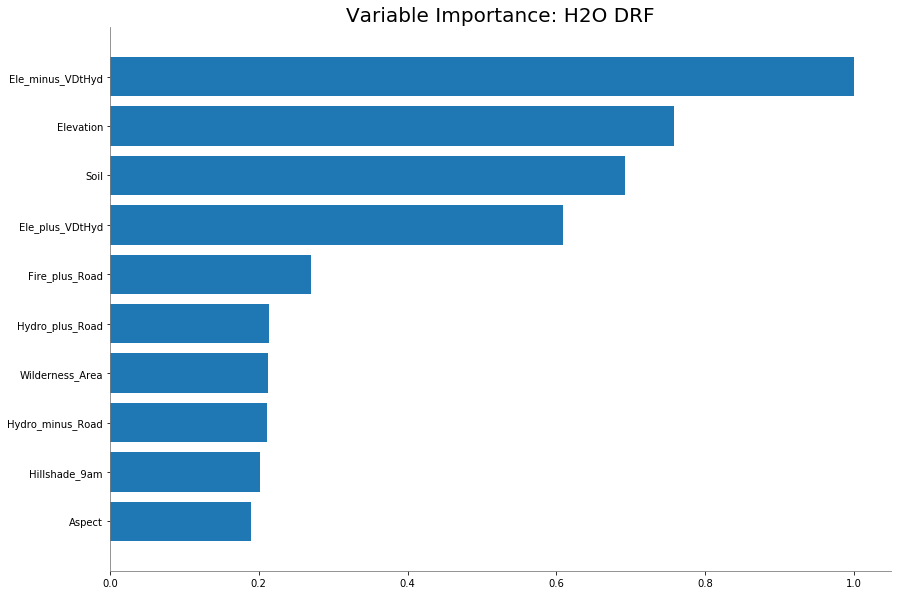

In [43]:
best_model.varimp_plot()

In [44]:
hf_test = h2o.H2OFrame(df_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


## Converting test frame to H2OFrame and predicting using the leader from the AML

In [45]:

Yr = aml.leader.predict(hf_test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


# Predictions

In [46]:
Yr

predict,p1,p2,p3,p4,p5,p6,p7
1,0.695721,0.253036,0.00382915,0.00124309,0.0400079,0.00444411,0.00171877
1,0.821692,0.155194,0.00224054,0.000713552,0.0165756,0.00249858,0.00108628
1,0.693231,0.288796,0.00231885,0.000758601,0.0103742,0.00324443,0.00127625
1,0.769706,0.213475,0.00214183,0.000700145,0.00986035,0.00294437,0.00117202
1,0.711223,0.256895,0.00297906,0.00097334,0.0223517,0.00397256,0.00160557
1,0.833515,0.15251,0.00182469,0.000596828,0.00814154,0.0024601,0.000952202
1,0.903061,0.0898522,0.00111843,0.000366859,0.00358311,0.00139245,0.000625884
1,0.927112,0.0676975,0.000914315,0.000299917,0.00229902,0.00114419,0.000532795
1,0.908721,0.0849127,0.00110848,0.000361942,0.00261041,0.00165298,0.000632579
1,0.902378,0.0920639,0.00102714,0.000335974,0.00220075,0.00142088,0.000573339


## Verifying Predicted and test counts for submission

In [47]:
Yr.shape

(565892, 8)

In [48]:
hf_test.shape

(565892, 66)

In [49]:
tmp = hf_test.as_data_frame()
tmpy = Yr.as_data_frame()

In [50]:
submission = pd.DataFrame({'Id':tmp['Id'], 'Cover_Type' : tmpy['predict']})

In [51]:
submission.to_csv("submission1.csv", index=False)

# Summary

The best voted kernel have manually verified the best model by comparing different models and they have done basic data analysis with minimal feature engineering.
However, we have calculated the euclidean distance between water and roadways features which wasn't implemented in the best kernel. This feature also ended up as the most important feature used by the H2O.
Also, we used H2O AutoML to automatically cross validate and verify all the models and also the stacked ensemble models.

# Contribution
Cleaning and imputation of data using Random Forest Regressor. Exploratory data analysis of different columns. Feature engineering - Creation of new columns by distance calculation on cartographical data. Implementation of H2O automl to predict type of forest cover. 

# Citations
- https://stackoverflow.com/questions/22875632/python-calculate-the-distance-with-different-data-types-in-python
- https://pandas.pydata.org/pandas-docs/version/0.22/
- http://docs.h2o.ai/
- https://www.esri.com/esri-news/arcuser/winter-2013/understanding-statistical-data-for-mapping-purposes
- https://www.tandfonline.com/doi/abs/10.1080/00087041.2016.1168141?src=recsys&journalCode=ycaj20
- https://en.wikipedia.org/wiki/Euclidean_distance
- https://github.com/nikbearbrown/CSYE_7245/blob/master/H2O/H2O_automl_lending_club.ipynb

# License

Must have a license such as the MIT License https://opensource.org/licenses/MIT

# Conclusion

**Predicted the forest cover type (the predominant kind of tree cover) from cartographical variables. There were no null values in dataset. Only column** ***Hillshade_3pm*** **had around 88 values marked as 0, which was taken care by imputing the 0 values by best fits using** ***Random Forest Regressor.*** **Summed up the raw value of different soil and wilderness area and performed feature engineering to generate new columns to measure the distance between the nearest roadway and water features for the particular cell using Euclidean distance and this feature turned out to be most important feature.
After training the data using Auto ML,** ***StackedEnsemble_AllModels_AutoML_20190301_210453*** **turned out to be the best model with a mean_per_class_error of 0.110317, logloss 0.300491, rmse value of 0.296899 and mse value of 0.0881489. Ele_minus_VDtHyd was the most important variable followed by elevation and soil.**

**The accuracy of the best model is 0.81 according to the evaluation criteria of Kaggle competition**